## CA2_DP_ML_HDip_Lvl8 
# Data Preparation and Machine Learning

---

<h3 style="color:purple"> problem statement:</h3>

eBay is providing an option of bidding to their customers globally. Bidding is employed to find the real price of items in the market based on the demand<br>
My task is to use classification or clustering algorithms to predict the bids in the future.

<h3 style="color:purple"> Solution:</h3>

here I used python programming to do data preparation and machine learning to classify bids as Normal or anomalous.

# Data Preparation

##### importing libraries

The first step is to import all required python libraries.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

1)pandas: pandas is used for data crunching.<br> 2)numpy : It is used for scientific computing it provides some mathematics and statistics like functions.<br> 3)Matplotlib: It is used for data Visualization For example to make Charts and graphs. <br> 4)Seaborn: It is also used for data Visualization For example to make Charts and graphs. so these are four major python libraries which I have imported to use.

##### importing dataset

In [5]:
train_data = pd.read_csv("Shill Bidding Dataset.csv")

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
train_data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


<h3 style='color:blue'>Characterisation of the data set:</h3>

#### shape of data:

In [8]:
train_data.shape

(6321, 13)

there are 6321 rows and 13 columns.rows are called as records and columns are called as attributes or features

#### genral overview of features:

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


Here above it shown that : <br> 1) Every feature have 6321 non_null values <br> 2) There are four features having datatype as integer,eight features having datatype as floating point and only one feature having datatype as object(string form)

#### checking missing or null values

In [10]:
train_data.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

There are no missing values in any feature.

<h3 style='color:blue'>Data Cleaning:</h3>

Data Cleaning is used for following things:  <br>
● To remove null values.<br>
● To fill null values.<br>
● To remove outliers.<br>
● To remove or modify data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted..

As there are no null values or any unwanted values so it is not needed to do data cleaning.

---

<h3 style='color:blue'>Exploratory Data Analysis(EDA):</h3>

###### what is EDA? <br>
Exploratory Data Analysis(EDA) is process of taking insights from the data.<br>
###### Reason : Why EDA is used?
It is used to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques.

### showing relationships between qualitative features and target feature ''class'' using bar charts

###### what are qualitative features? <br>
Qualitative features are those features which contains catagarical or discrete type of values.

###### Reason: why qualitative features are extracted?<br>
As Qualitative features are features with less categories which are used to do qualitative analysis so it is needed to extarct Qualitative features.

In [11]:
qual_features=[feature for feature in train_data.columns if len(train_data[feature].unique())<=10]
qual_features

['Successive_Outbidding', 'Auction_Duration', 'Class']

Here above it is list of three qualitative features .

##### Unique values of qualitative features .

In [12]:
for feature in qual_features:
    print(feature)
    print(train_data[feature].unique())

Successive_Outbidding
[0.  1.  0.5]
Auction_Duration
[ 5  7  1  3 10]
Class
[0 1]


there are two unique values in class feature , three unique values in Successive_Outbidding and five unique values in Auction_Duration

###### Reasons: <br>
here below bar charts are used for following things:<br>
● To show count of catagaries.<br>
● To show camparision of average of class values based on every catagary <br>
● camparision chart (2nd chart) is helfull to show tendency to 1 or 0 of every catagery.<br>
● to know about most occured category in categorical features

Successive_Outbidding


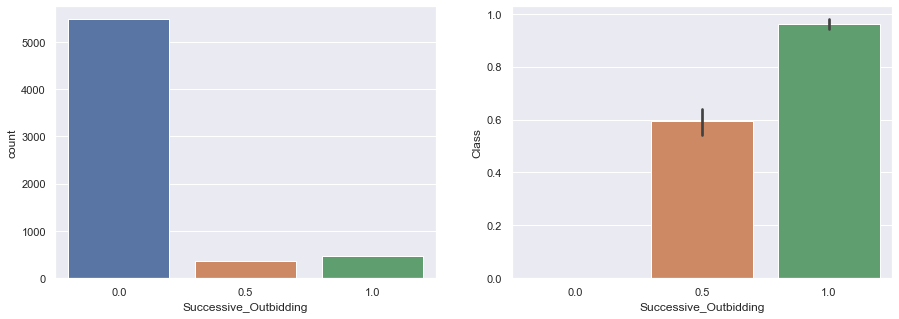

Auction_Duration


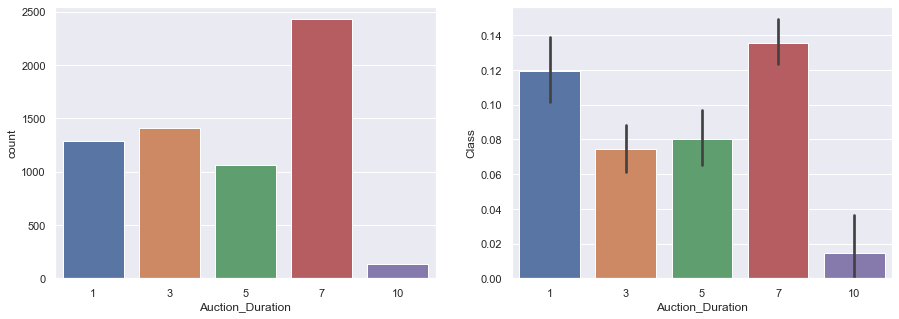

Class


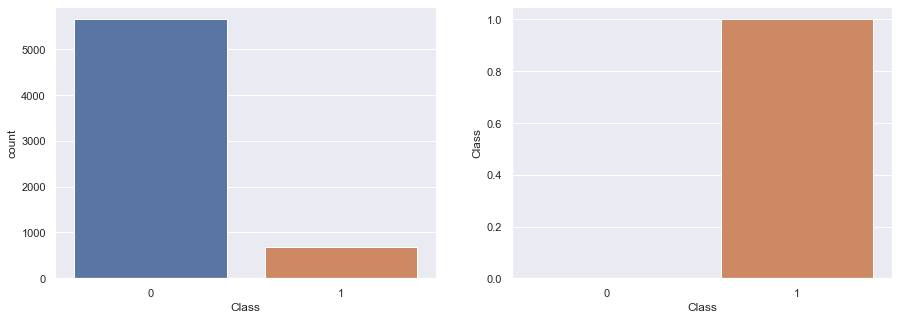

In [13]:
for feature in qual_features:
    print(feature)
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature,data=train_data)
    plt.subplot(1, 2, 2)
    sns.barplot(x=feature,y='Class',data=train_data)
    plt.show()

###### Results:<br>
First left bar chart shows that zero is most occuring catagery of Successive_Outbidding. <br>
First right bar chart shows that zero Successive_Outbidding catagery has tendency towards normal(0) bid 

Second left bar chart shows that most occuring Auction_Duration is seven days. <br>
Second right bar chart shows that seven days Auction_Duration and one day Auction_Duration has most tendency towards anomalous bid(1). 

last left bar chart shows that most occuring class of bids is normal(0) bid . <br>

### showing distributions of quantitave features using histograms

###### What are quantitave features?<br>
Quantitative features are numerical features. <br>
Quantitative features generally having contineous values which means that these features not having catagarical or discrete values

###### Reason:Why Quantitative features are extracted ?<br>
As i wanted to know about how values in quantitave features are distributed so that is why I extracted Quantitave features.

In [14]:
quant_features=[feature for feature in train_data.columns if train_data[feature].dtype!='O' and 
                len(train_data[feature].unique())>10 ]
quant_features

['Record_ID',
 'Auction_ID',
 'Bidder_Tendency',
 'Bidding_Ratio',
 'Last_Bidding',
 'Auction_Bids',
 'Starting_Price_Average',
 'Early_Bidding',
 'Winning_Ratio']

Here above it is list of nine qualitative features .

Here below values are distributed with specific range. every vertical bar of histogram shows how musch frequency a distribution have?<br>
Histograms are helpfull to show how values of a feature are distributed.

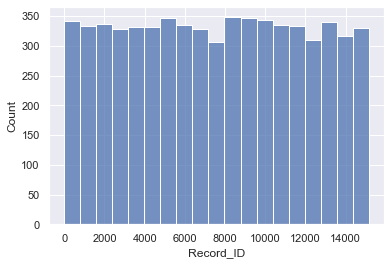

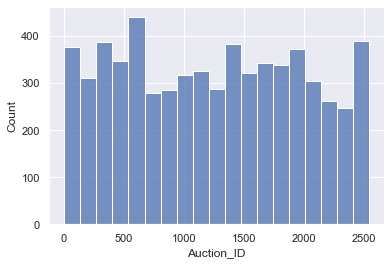

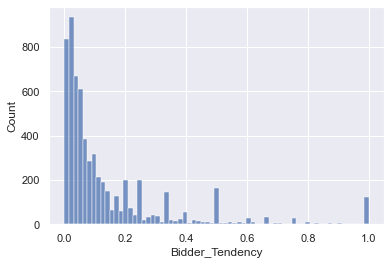

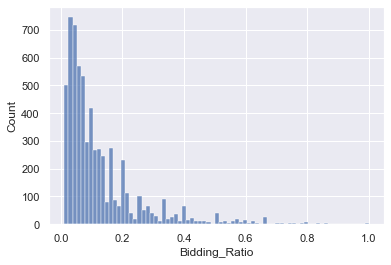

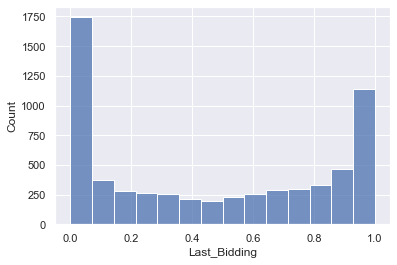

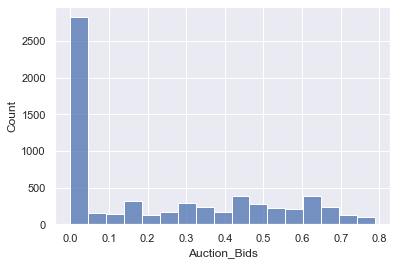

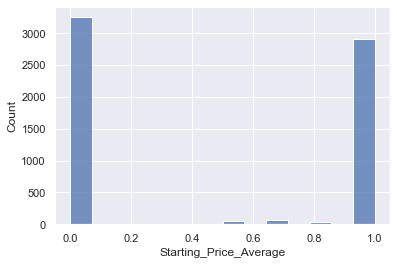

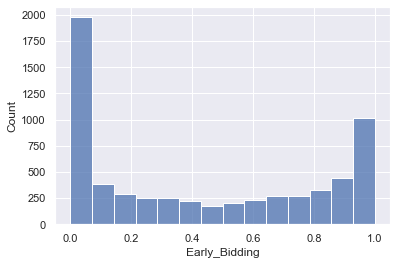

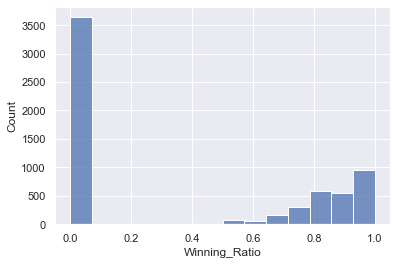

In [15]:
for feature in quant_features:
    sns.histplot(train_data[feature])
    plt.show()

###### Results:<br>
histogram of Bidder_Tendency histogram shows that most of bids are performed between 0.0 and 0.2 Bidder_Tendency <br>
histogram of Bidding Ratio shows that most of bids are performed between 0.0 and 0.2 Bidding Ratio <br>
histogram of Last Bidding shows that most of bids are performed between 0.0 and 0.1 Last Bidding <br>
histogram of Auction_Bids shows that most of bids are performed between 0.0 and 0.1 Auction_Bids <br>
histogram of Starting_Price_Average shows that most of bids are performed at 0.0 and 1.0 Starting_Price_Average <br>
histogram of Early_bidding shows that most occuring Early Bidding is 0 <br>
histogram of Winning Ratio shows that most occuring Winning Ratio is 0 <br>

### showing correlation between features

###### Reason:Why Correlation is used? <br>
Here The intereset is to know about what type of relationship A feature have with another feature.<br>
so that is why heatmap is used to show score of correlation of every feature with each other .

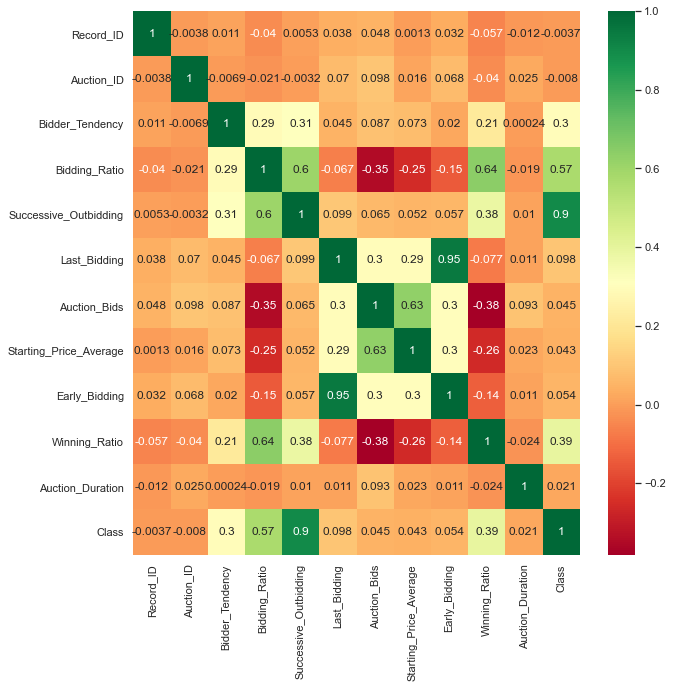

In [16]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

###### Result:<br>
As shown in heatmap that Successive_Outbidding and Bidding_Ratio are very high correlated feature with target feature class.

#### numerical_features

###### Reason:why nummerical features are used?<br>
Here numerical_features are extracted because it is used in graph of realtionships.

In [17]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
numerical_features

['Record_ID',
 'Auction_ID',
 'Bidder_Tendency',
 'Bidding_Ratio',
 'Successive_Outbidding',
 'Last_Bidding',
 'Auction_Bids',
 'Starting_Price_Average',
 'Early_Bidding',
 'Winning_Ratio',
 'Auction_Duration',
 'Class']

In [18]:
len(numerical_features)

12

here above there is list of 12 numerical_features.

In [19]:
numerical_features[2:11]

['Bidder_Tendency',
 'Bidding_Ratio',
 'Successive_Outbidding',
 'Last_Bidding',
 'Auction_Bids',
 'Starting_Price_Average',
 'Early_Bidding',
 'Winning_Ratio',
 'Auction_Duration']

as 'Record_ID' and 'Auction_ID' are useless features for building relations

##### showing relationships between qualitative features and target feature ''class'' using graph

###### Reason:why graphs of relationships are used?<br>
Here below graph is used to show follwing: <br>
● positive or negative relationship between target feature and quantitative feature

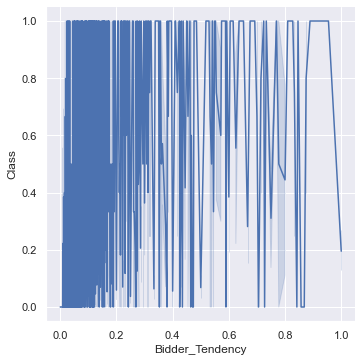

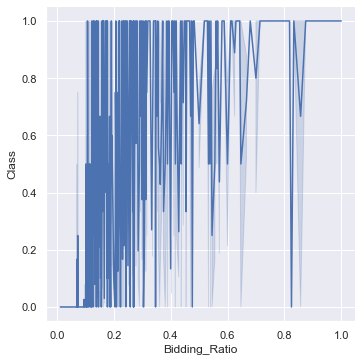

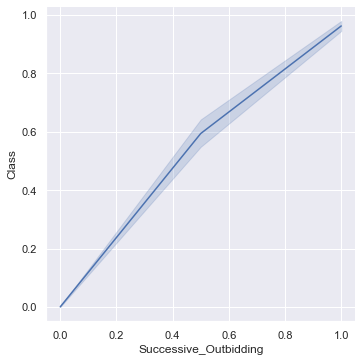

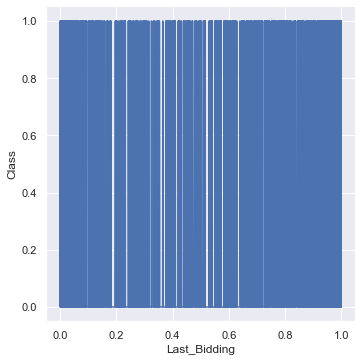

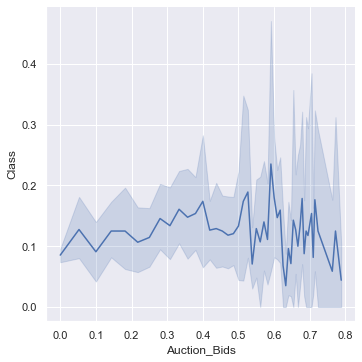

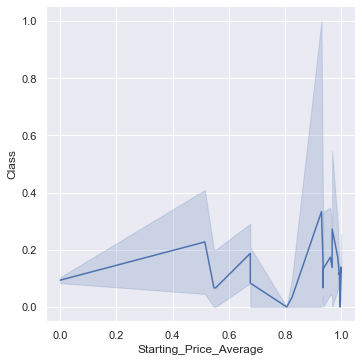

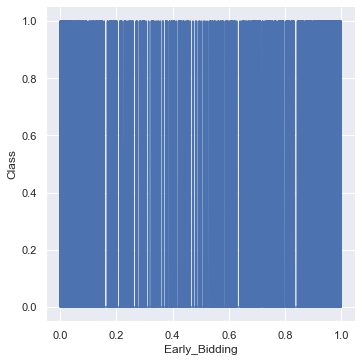

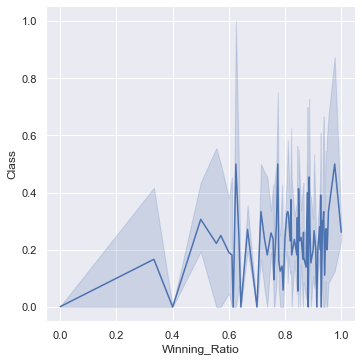

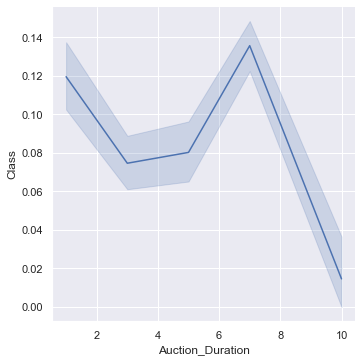

In [20]:
for feature in numerical_features[2:11]:
    sns.relplot(x=feature,y="Class",data=train_data,kind='line')
    plt.show()

#### results:  <br>
● Successive_Outbidding and winning ration has strongly related with Class of bids tends to (1) anomalous bids.<br>
● Auction_Duration has negative relation tends towards zero (normal bids)

---

<h3 style='color:blue'>One hot encoding:</h3>

###### What is one hot encoding?<br>
one hot encoding is process which is used to convert non numerical features into numerical features by converting catageries into integers.

###### Reason:Why one hot encoding is used? <br>
Here the interest is to convert non_numerical features into numerical because it is must for a feature to be numerical so it can be used in machine learning process.
That is why one hot encoding is used.

###### Reason:why extarcting non numerical feature? <br>
As I have to convert non numerical feature into categorical so that is why non numerical feature is extracted.

In [21]:
non_numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']
non_numerical_features

['Bidder_ID']

Here Bidder_ID is non nummerical feature but it is not needed in machine learning so one hot encoding is not used here.

*****

### splitting dataset into dependant and independant 

Here data is divided into dependent and Independent features. Dependant features are inputs for training process and Independent features is output for machine learning process.

###### reason of splitting data? <br>
As machine learning model requires two things input training data and output training data so that is why splitting is performed to devide data into output data(dependen feature) and inputs(dependant features).

In [22]:
X=train_data[['Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration']]
X

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7
...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7


here eight features are selected as inputs.

In [23]:
y=train_data['Class']
y

0       0
1       0
2       0
3       0
4       0
       ..
6316    1
6317    0
6318    0
6319    0
6320    0
Name: Class, Length: 6321, dtype: int64

as class is target feature which is used as dependant feature(output).

<h3 style='color:blue'>Feature Scaling:</h3>

###### what is Standardization?<br>
Standardization is scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

###### Reason:Why Standardization is used?<br>
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.91570792e-01,  2.07063786e+00, -3.71076191e-01, ...,
        -1.13105468e+00,  6.84785358e-01,  1.56058278e-01],
       [-5.99541854e-01,  5.49956797e-01, -3.71076191e-01, ...,
        -1.09666273e+00,  1.32110381e+00,  1.56058278e-01],
       [ 1.60556670e-03,  5.49956797e-01, -3.71076191e-01, ...,
        -1.12313912e+00,  1.44836750e+00,  1.56058278e-01],
       ...,
       [-4.41396861e-01, -6.40141428e-01, -3.71076191e-01, ...,
        -1.08999087e+00, -8.42378931e-01,  9.66945555e-01],
       [-3.32969695e-01, -3.09558586e-01, -3.71076191e-01, ...,
        -1.13003766e+00, -8.42378931e-01,  9.66945555e-01],
       [-6.40120753e-01, -6.40141428e-01, -3.71076191e-01, ...,
        -2.37244453e-01, -8.42378931e-01,  9.66945555e-01]])

<h3 style='color:blue'>dimensional reduction:</h3>

###### What is dimensional reduction?<br>
Dimensionality reduction refers to techniques for reducing the number of input variables in training data. When dealing with high dimensional data, it is often useful to reduce the dimensionality by reducing features. <br>
It has two main techniques: <br>
● Principal Component Analysis (PCA) <br>
● Linear Discriminant Analysis (LDA) <br>

###### Why dimentional Reduction is used?<br>
Here dimentional reduction is used to reduce number of features or attributes so that is why dimentional reduction technique used.

In [25]:
X.columns

Index(['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding',
       'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average',
       'Early_Bidding', 'Winning_Ratio', 'Auction_Duration'],
      dtype='object')

In [26]:
len(X.columns)

9

Threre are 9 feature as inputs.

#### Principal Component Analysis (PCA)

Principal Component Analysis, or PCA, is a dimensionality-reduction method to find lower-dimensional space by preserving the variance as measured in the high dimensional input space. It is an unsupervised method for dimensionality reduction.

In [27]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(6321, 7)

Here above number of features are reduced to 7 .which makes 95 % importance to Model.

##### variance  of features

In [28]:
pca.explained_variance_ratio_

array([0.30739291, 0.23382242, 0.13848929, 0.11021484, 0.08177317,
       0.05702722, 0.03818812])

#### visulizing PCA

Text(0, 0.5, 'Second Principal Component')

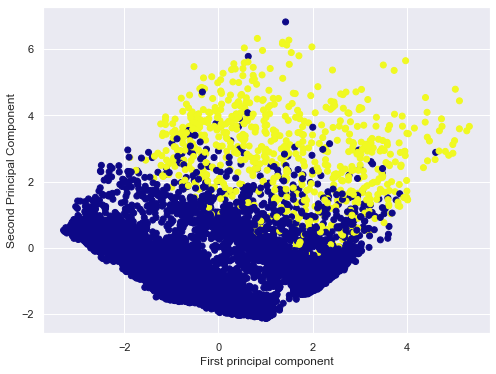

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

as two classes are clear here

#### Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis is a linear model for classification and dimensionality reduction.  Most commonly used for feature extraction in pattern classification problems.

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_LDA = lda.fit_transform(X,y)
X_LDA.shape

(6321, 1)

LDA allowed for only one parameter 

In [31]:
lda.explained_variance_ratio_

array([1.])

As there is only one attribute so we can not visulize LDA.

<h3 style='color:blue'>How PCA and LDA affect results?</h3>

#### predictions results using PCA

Here below dataset is divided into train as test data is not used to train model.

In [32]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

Here logistic regression algorithim is used to predict and test results of pca_training and testing data. 

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9699604743083003

As model gives 96 % accuracy on total 7 attributes.

#### predictions results using LDA

here below dataset is divided into train as test data is not used to train model.

In [34]:
from sklearn.model_selection import train_test_split
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_LDA, y, test_size=0.2, random_state=30)

Here logistic regression algorithim is used to predict and test results of LDA_training and LDA_testing data. 

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_lda, y_train)
model.score(X_test_lda, y_test)

0.9786561264822135

as shown it is 97% accuracy rate with one attribute of LDA_training data.

<h3 style='color:blue'>Difference between PCA and LDA:</h3>

#### Principal Component Analysis(PCA): <br>
Principal Component Analysis(PCA) is a commonly used unsupervised linear transformation technique.<br> PCA reduces the number of dimensions by finding the maximum variance in high dimensional data

#### Linear Discriminant Analysis(LDA) <br>
Linear Discriminant Analysis(LDA) is a supervised method that takes class labels into account when reducing the number of dimensions. The goal of LDA is to find a feature subspace that best optimizes class separability.

# Machine Learning

### train test splitting

###### What is train test splitting?<br>
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. <br>

###### Reason:Why train test splitting is used?<br>
train test splitting is used to devide data into train part and test part as train data is used to train model and test data is used to test model.


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Here above size of test data is 20% so size of training dataset is 80%.

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5056, 9), (1265, 9), (5056,), (1265,))

as 5056 rows are for training and 1265 are reserved for testing.

### Model building: <br>
This is Machine Learning Model building stage in which four types of classification algorithims are used along with parameters. <br>
In this stage training data is given to model so in this stage classification models learns from training data.

<h3 style="color:blue">Logical justification based on the reasoning for the specific choice of machine learning approaches:</h3> <br>

##### Why Supervised Machine Learning is used rather than Unsepervised Machine Learning? <br>
Here Supervised Machine Learning is used because with the help of supervised learning, the model can predict the output on the basis of training data.<br>
Unsepervised Machine Learning is used to view patterns or clusters <br>
As here the task is to prepare a Machine Learning Model which classify bids as normal or abnormal so Supervised Machine Learning Techniques are solution here.

##### Why Classification is used here rather than Regression? <br>
Classification is used where dependant feature or target feature is Categorical and Regression is used Where dependant feature or target feature is Continuous <BR>
 As here target variable 'Class' contains two categories or classes which is one or zero so Classification is used here.

**************************

##### What is Logistic Regression Algorithim and why it is used?<br>
Logistic regression is one the Supervised Machine Learning technique used for classification. It is used for predicting the categorical dependent variable using a given set of independent variables. Logistic regression predicts the output of a categorical dependent variable.

In [38]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(solver='lbfgs',C=0.1)
LGR.fit(X_train,y_train)

LogisticRegression(C=0.1)

##### what is Decision Tree Algorithim and why it is used? <br>
The decision tree Algorithm are also comes under supervised machine learning algorithms. It can be used for both a classification problem as well as for regression problem.

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(max_depth=3)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

##### what is Random Forest Algorithim and why it is used?<br>
Random forest is also a Supervised Machine Learning Algorithm .<br>Likewise Decision Tree Algorithim it is used widely in Classification and Regression problems.

In [40]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features='log2',n_estimators=2)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=2)

##### what  are Support vector machine Algorithim(SVMs) and why these are used? <br> 
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [41]:
from sklearn.svm import SVC
Svc = SVC(kernel='linear',C=10,gamma='auto')
Svc.fit(X_train,y_train)

SVC(C=10, gamma='auto', kernel='linear')

<h3 style="color:blue">comparison between the chosen modelling approaches:</h3> <br>
Here below performance of classification models is compared using Acuracy Score.
As I am interested to know About How classification model performing so that is why Model Evaluation is used?

#### Accuracy of classification model: <br>
In the case of classification Accuracy score is  the ratio of true predictions and total predictions. <br>

<h6 style="color:green">Accuracy Score=True Predictions/Total Predictions</h6> <br>


##### Accuracy Score of Logistic Regression Model:

In [42]:
LGR.score(X_test, y_test)

0.9652173913043478

##### Accuracy Score of Decision Tree Classifier :

In [43]:
DTC.score(X_test, y_test)

0.9794466403162055

##### Accuracy Score of Random Forest Classifier:

In [44]:
RFC.score(X_test, y_test)

0.9928853754940712

##### Accuracy Score of Support vector machine Model:

In [45]:
Svc.score(X_test, y_test)

0.974703557312253

#### Conclusions: <br>
As Decision Tree classification Model has greatest Accuracy Score but it is not finalized that this is best performing model.<br>
So other Evaluation techniques are also used.

****************************************

<h3 style='color:blue'>K Fold Cross validation</h3>

###### What is K Fold cross validation?<br>
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.
<br>
<br>

### K Fold Cross validation for model selection <br>
 

##### reason:
Here my interest is know about Which Machine Learning Model gives us highest accuracy score.So that is why K Fold cross validation is used<br>


In [46]:
from sklearn.model_selection import cross_val_score
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring

Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.997311,0.975635,0.994937,0.992089


#### results:<br>
Decision Tree Classification,Random Forest Regression and Support Vector machine are best performing models having accuracy more than 99%.

### K Fold Cross Validation for hyperparametes of Support Vecter Machine model <br>


###### reason:<br>
Here my interest is to know about which hyperparametrs of Support Vector Machine model can increase accuracy of machine learning model.<br>

In [47]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(SVC(kernel=kval,C=cval,gamma='auto'),X,y, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9955701205783759,
 'rbf_10': 0.9981013909040877,
 'rbf_20': 0.998259618752189,
 'linear_1': 0.9800664181718117,
 'linear_10': 0.9799081903237103,
 'linear_20': 0.9799081903237103}

**From above results we can say that rbf with C=20  give best performance**

<h3 style="color:blue">Evaluation of classification models:</h3><br>

To check performance of Machine Learning Models Evaluation techniques are used <br>
Following are commenly used techniques to evaluate classification models: <br>

● Accuracy Score. <br>
● Confusion matrix. <br>
● Precision and recall.<br>
● F1 score.<br>

### precision,recall and F1_score <br>


###### Reason:Why precision,recall and F1_score is used to evaluate?<br>
as accuracy score is not enough for the measure of the performance. So precision,recall and F1_score are used to Evaluate.

#### precision: <br>
This refers to total number of all observations that have been predicted to belong to the positive class and are actually positive. <br>

<h6 style="color:green">precision=TP/(TP+FP)</h6> <br>

#### Recall <BR>
This is the proportion of observation predicted to belong to the positive class, that truly belongs to the positive class. It indirectly tells us the model’s ability to randomly identify an observation that belongs to the positive class.<BR>
<h6 style="color:green">Recall=TP/(TP+FN)</h6> <br>

#### F1 Score: <br>
It is Harmonic Mean of the precision and recall.This is good metric for classification.<br>
<h6 style="color:green">F1 Score=2*Precision*Recall/(Precision+Recall)</h6> <br>

<h3 style='color:blue'>Table of ML modelling outcomes </h3> <br>

###### Reason to show table:<br>
Here I wants to make a built In python function which calculates precision,recall and F1_score and then make a table of it.<br.
so this is python code whhich is used to calculate precision,recall and F1_score and then return a table

In [48]:
from sklearn import metrics

Models=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs'),RandomForestClassifier(),SVC(kernel='rbf',C=20,gamma='auto')]

Model_names=['Decision Tree Classifier','Logistic Regresion Classifier','Random Forest Classifier','Support Vecter Machine Model']

Scores=[]
Precisions=[]
Recalls=[]
F1_Scores=[]

def calculate_F1_score(x,y):
    from sklearn import metrics as mt
    return 2*mt.precision_score(x,y)*mt.recall_score(x,y)/(mt.precision_score(x,y)+mt.recall_score(x,y))

for model in Models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Scores.append(model.score(X_test,y_test))
    Precisions.append(metrics.accuracy_score(y_test,y_pred))
    Recalls.append(metrics.recall_score(y_test,y_pred))
    F1_Scores.append(calculate_F1_score(y_test,y_pred))
    
    
Table=pd.DataFrame(list(zip(Model_names,Scores,Precisions,Recalls,F1_Scores)),columns =['Model Name','Accuarcy Score','Precision','Recall','F1_Score'])

In [49]:
Table

,Model Name,Accuarcy Score,Precision,Recall,F1_Score
0,Decision Tree Classifier,0.999209,0.999209,0.992424,0.996198
1,Logistic Regresion Classifier,0.974704,0.974704,0.886364,0.879699
2,Random Forest Classifier,0.991304,0.991304,0.992424,0.959707
3,Support Vecter Machine Model,0.999209,0.999209,0.992424,0.996198


<h3 style='color:blue'>Rationale for the selection of models and justify the choice of hyperparameters</h3> <br>

#### why Support Vecter Machine(SVC) is best? <br>
Out of four classification Models it shown above in table that Support Vecter Machine(SVC) is best performing model with highest accuracy and F1_Score. <br>
So Support Vecter Machine(SVC) is best performing Model.

#### which hyperparameters? <br>
By results of cross validation applied on Support Vecter Machine(SVC) it shown that Support Vecter Machine(SVC) gives highest accuracy with hyperparameters of kernal='rbf' and C=20.

<h3 style='color:blue'>graphics to illustrate the similarities and contrast of the Machine Learning modelling outcomes.</h3>

#### Confusion Matrix for Logistic Regression Model

Text(66.5, 0.5, 'Truth')

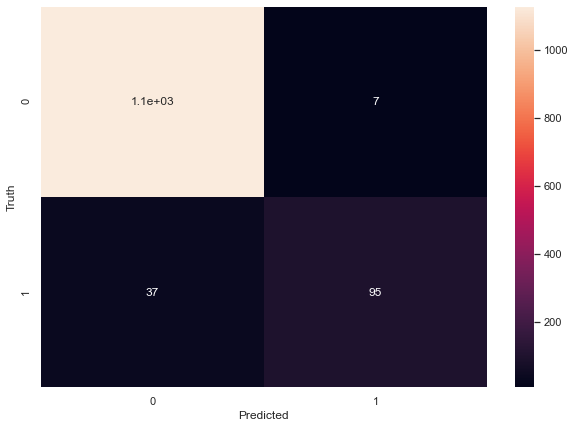

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,LGR.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Confusion Matrix for Decision Tree Classification Model

Text(66.5, 0.5, 'Truth')

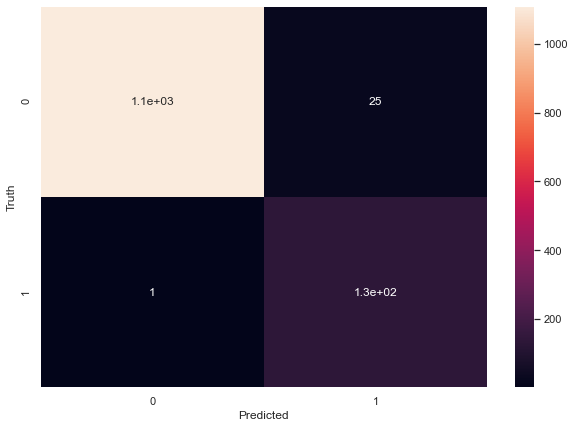

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,DTC.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Confusion Matrix for Random Forest Model

Text(66.5, 0.5, 'Truth')

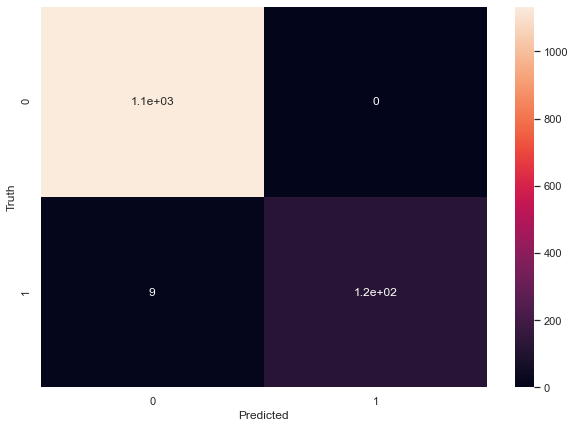

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,RFC.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Confusion Matrix for Support Vecter Machine(SVC) Model

Text(66.5, 0.5, 'Truth')

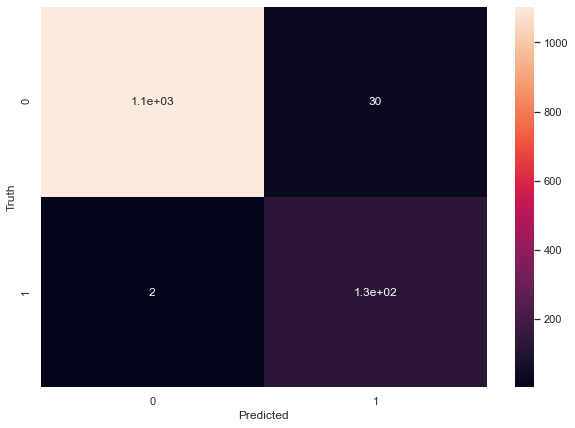

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Svc.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:blue'>Findings of dataset:</h3>

This dataset can be found on UCI Machine Learning Repository. <br>
https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset
    

<h3 style='color:blue'>Reference and Citations:</h3>

***A Brief Introduction to Linear Discriminant Analysis posted by Sunil Kumar Dash on analyticsvidhya.com***<br>
https://www.analyticsvidhya.com/blog/2021/08/a-brief-introduction-to-linear-discriminant-analysis/  

**Various ways to evaluate a machine learning model’s performance posted by Kartik Nighania on towardsdatascience.com** <br>
https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15

**Dimensionality Reduction for Machine Learning posted by Nilesh Barla on neptune.ai**<br>
https://neptune.ai/blog/dimensionality-reduction


**Tune Hyperparameters for Classification Machine Learning Algorithms posted by Jason Brownlee on Machine Learning Mastery** <br>
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
